<a href="https://colab.research.google.com/github/Piyush9323/Bivariate_gauusian_and_box-muller_method-to-confirm./blob/main/Genearting_uni_bi_variate_gaussian_box_muller_method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AUTHOR : PIYUSH SHARMA

1. Drawing samples from uni-variate Normal distribution and plotting its histogram.
Computing pdf for uni-variate Normal distribution and comparing it with histrogram.

In [ ]:
# UNIVARIATE GAUSSIAN DISTRIBUTION
import numpy as np
import matplotlib.pyplot as plt 
from scipy.stats import norm

mu = 0 
sigma = 1

def univariate_gauss_dist(mu,sigma,N):
    #Drawing N samples
    sample = np.random.normal(mu, sigma, N)

    #print("1D sample_100 filled with random values as per gaussian distribution : \n", sample_100);

    # //  FOR DEBUGGING ONLY
    #print(abs(mu - np.mean(sample_100)))
    #print(abs(sigma - np.std(sample_100, ddof=1)))
    # //

    # Plotting histogram
    count, bins, ignored = plt.hist(sample, 20, density=True) 
    plt.title("Univariate Gaussian Distribution")
    plt.xlabel("sample bins")
    plt.ylabel("Probabilities")
    #plt.style('seaborn')

    #Plotting pdf
    plt.plot(bins,1/(sigma * np.sqrt(2 * np.pi)) *np.exp( - (bins - mu)**2 / (2 * sigma**2) ),linewidth=2, color='r') 
    plt.show() 

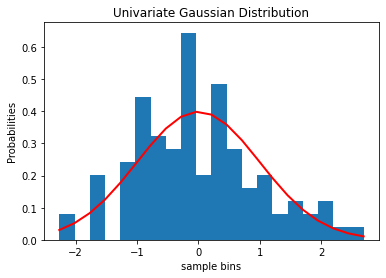

In [ ]:
# Experiment with 100 samples.
univariate_gauss_dist(mu,sigma,100)

In [ ]:
# Repeating experiment with 500 samples.
univariate_gauss_dist(mu,sigma,500)

No handles with labels found to put in legend.


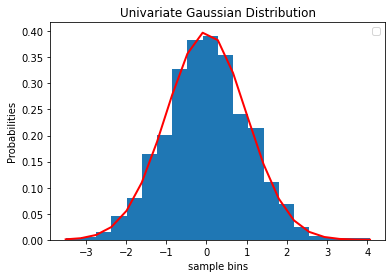

In [ ]:
# Repeating experiment with 1000 samples.
univariate_gauss_dist(mu,sigma,1000)

2. Drawing 100 samples from bi-variate Normal distribution and plotting the histrogram.
Computing pdf for bi-variate Normal Distribution and comparing it with histrogram.

In [ ]:
# BIVARIATE NORMAL DISTRIBUTION
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D
N = 100  
mu1, mu2 = -2, 5
sigma1, sigma2 = 2, 16

def bivariate_normal_dist(mu1,mu2,sigma1,sigma2,N):
    # Sampling X1 and X2
    X1 = np.random.normal(mu1, sigma1, N)
    X2 = np.random.normal(mu2, sigma2, N)

    # Mean vector
    mu = np.array([mu1, mu2])

    # 2d array of samples
    P = np.array([X1,X2])

    # Computing Variance Covariance matrix , its inverse and determinant
    VC = np.cov(P)
    VC_det = np.linalg.det(VC)
    VC_inv = np.linalg.inv(VC)

    #Sampling bivariate
    rv = multivariate_normal(mu,VC)
    #print(X,Y)                    FOR DEBUGGING ONLY 
    #print(X1,X2,P)                FOR DEBUGGING ONLY
    #print("VC= ",VC)              FOR DEBUGGING ONLY 
    
    # Normalized histrogram
    hist, xedges, yedges = np.histogram2d(X1, X2, bins=30, density = True)
    
    # Plotting bivariate
    fig = plt.figure()
    fig = plt.gcf()
    fig.set_size_inches(8, 6)
    ax = fig.gca(projection='3d')
    
    # Constructing arrays for the anchor positions of the bars.
    xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25)
    xpos = xpos.flatten('F')
    ypos = ypos.flatten('F')
    zpos = np.zeros_like(xpos)
    
    # Constructing arrays with the dimensions for bars.
    dx = dy = 0.5 * np.ones_like(zpos)
    dz = hist.flatten()
    
    # Plotting the bivariate normal histrogram
    ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color='b', zsort='average')
    ax.set_xlabel('Normal X1 on X axis')
    ax.set_ylabel('Normal X2 on Y axis')
    ax.set_zlabel('Bivariate Probability Distribution on Z axis')
    plt.show()
    
    #Creating grid and bivariate normal in 3d array
    X, Y = np.meshgrid(X1,X2)
    pos = np.empty(X.shape + (2,))
    pos[:, :, 0] = X
    pos[:, :, 1] = Y
    
    # Computing pdf of bivariate normal distribution
    bi = np.arange(N)
    bi = bi.astype(float)
    def bivariate_gaussian(pos, mu, VC):
        D = np.sqrt(((2*np.pi)**2) * VC_det)
        N = len(X1)
        for i in range(N):
            P1 = np.array([X1[i]-mu[0],X2[i]-mu[1]])
            t1 = np.dot(P1.transpose(),VC_inv)
            t2 = np.dot(t1,P1)
            bi[i] = np.exp(-t2/2) / D
    bivariate_gaussian(pos, mu, VC)
    
    # Plotting PDF of bivariate normal distribution
    fig = plt.figure()
    fig.set_size_inches(8, 6)
    ax = fig.gca(projection='3d')
    ax.plot_surface(X, Y, rv.pdf(pos),cmap='viridis',linewidth=0)
    ax.set_xlabel('Normal X1 on X axis')
    ax.set_ylabel('Normal X2 on Y axis')
    ax.set_zlabel('Bivariate Probability Distribution on Z axis')
    plt.show()

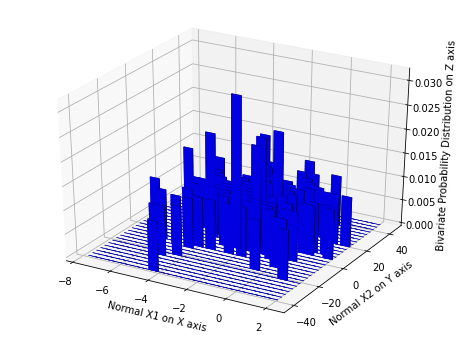

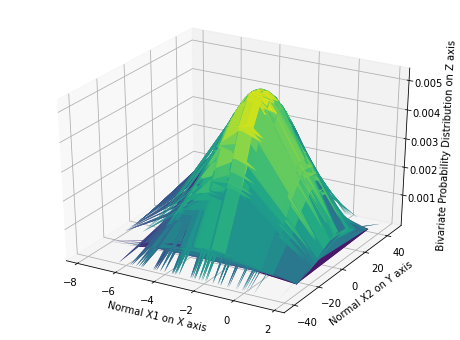

In [ ]:
# Experiment with 100 samples
bivariate_normal_dist(mu1,mu2,sigma1,sigma2,100)

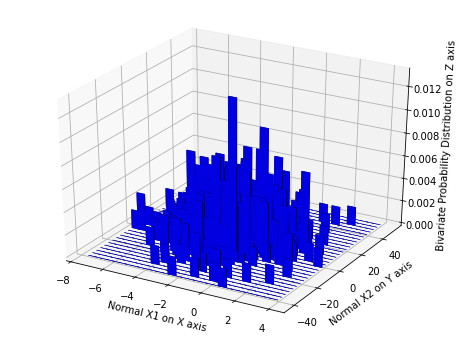

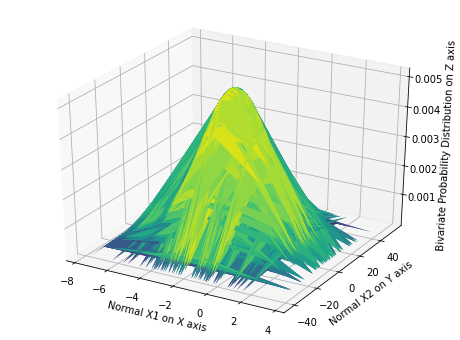

In [ ]:
# Experiment with 500 samples
bivariate_normal_dist(mu1,mu2,sigma1,sigma2,500)

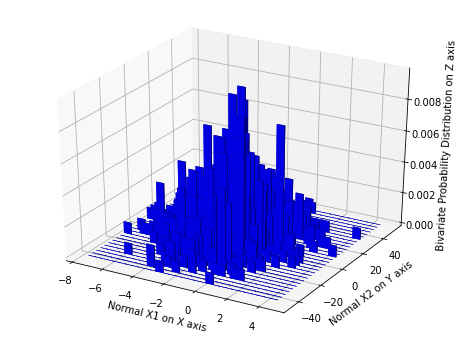

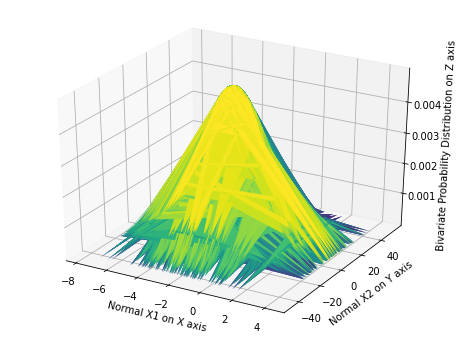

In [ ]:
# Experiment with 1000 samples
bivariate_normal_dist(mu1,mu2,sigma1,sigma2,1000)

3. Implementing Central Limit Theorem.

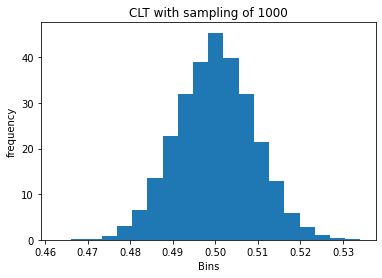

In [ ]:
# IMPLEMENTING CENTRAL LIMIT THEOREM
import numpy as np
import matplotlib.pyplot as plt

N = 12
def clt(N,sample_size):
    sample_means = []
    for i in range(N):
        for j in range(sample_size):
            sample = np.random.uniform(0, 1, sample_size)
            sample_means.append(sample.mean())
    return sample_means

means = clt(N,1000)

count, bins, ignored = plt.hist(means, 20, density=True)
plt.title('CLT with sampling of 1000')
plt.xlabel('Bins')
plt.ylabel('frequency')
plt.show()

OBSERVATION OF CLT implementation : Even thought the sampling is done from uniform distribution. The sample means are showing a normal distribution.  

4. **Box-Muller method to achieve Normal distribution.**

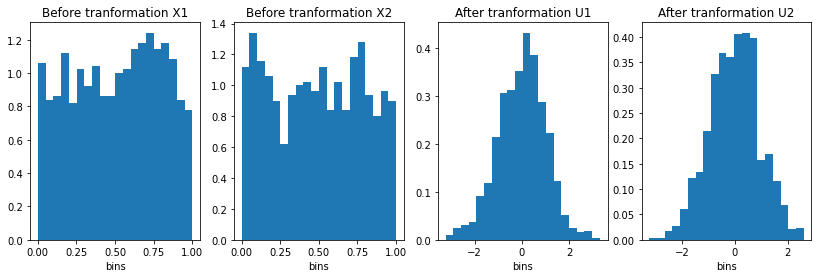

In [ ]:
# Box Muller Method
N=1000
import numpy as np
from numpy import random, sqrt, log, sin, cos, pi
import matplotlib.pyplot as plt

N = 1000
# X1 and X2 are uniform distributions
X1= np.random.uniform(0, 1, N)
X2= np.random.uniform(0, 1, N)

# Transformation function
def gaussian(X1,X2):
  U1 = sqrt(-2*log(X1))*cos(2*pi*X2)
  U2 = sqrt(-2*log(X1))*sin(2*pi*X2)
  return U1,U2


# Runninng the transformation
U1,U2 = gaussian(X1,X2)

# plotting the values before and after the transformation
fig, [ax1, ax2, ax3, ax4] = plt.subplots(1,4,figsize = (14,4))

counts_1, bins_1, ignored = ax1.hist(X1, 20, density = True) 
ax1.set_xlabel('bins')
ax1.set_title('Before tranformation X1')

counts_2, bins_2, ignored = ax2.hist(X2, 20, density = True)
ax2.set_xlabel('bins')
ax2.set_title('Before tranformation X2')

counts_3, bins_3, ignored = ax3.hist(U1, 20, density = True)
ax3.set_xlabel('bins')
ax3.set_title('After tranformation U1')

counts_4, bins_4, ignored = ax4.hist(U2, 20, density = True)
ax4.set_xlabel('bins')
ax4.set_title('After tranformation U2')
plt.show()


After applying box-muller transformation on two uniform distributions, we got two gaussian distributions.